In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge


In [2]:
dt = pd.read_csv('../data/nam_processed_data.csv')
print(dt.head())

   bhk  area  status  price_in_USD  house_type  new  region_Agripada  \
0    2   650       1      314400.0           0    0             True   
1    1   803       0      270000.0           0    0             True   
2    1   684       0      204000.0           0    0             True   
3    1   545       0      192000.0           0    0             True   
4    2  1650       0      420000.0           0    0             True   

   region_Airoli  region_Ambernath East  region_Ambernath West  ...  \
0          False                  False                  False  ...   
1          False                  False                  False  ...   
2          False                  False                  False  ...   
3          False                  False                  False  ...   
4          False                  False                  False  ...   

   region_Vangani  region_Vasai  region_Vashi  region_Vikhroli  \
0           False         False         False            False   
1       

In [3]:
print(dt.shape)

(45343, 115)


In [4]:
print(dt.head())

   bhk  area  status  price_in_USD  house_type  new  region_Agripada  \
0    2   650       1      314400.0           0    0             True   
1    1   803       0      270000.0           0    0             True   
2    1   684       0      204000.0           0    0             True   
3    1   545       0      192000.0           0    0             True   
4    2  1650       0      420000.0           0    0             True   

   region_Airoli  region_Ambernath East  region_Ambernath West  ...  \
0          False                  False                  False  ...   
1          False                  False                  False  ...   
2          False                  False                  False  ...   
3          False                  False                  False  ...   
4          False                  False                  False  ...   

   region_Vangani  region_Vasai  region_Vashi  region_Vikhroli  \
0           False         False         False            False   
1       

In [5]:
X = dt.drop(['price_in_USD'], axis = 1)
Y = dt.price_in_USD


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X , Y ,test_size = 0.2, random_state=10)
X_k, X_val, Y_k, Y_val = train_test_split(X, Y, test_size=0.3, random_state=10)

In [7]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [23]:
# Define the Ridge model
ridge = Ridge()

# Set up the parameter grid for alpha
param_grid = {'alpha': np.logspace(-4, 4, 100)}

# Perform grid search with cross-validation
ridge_cv = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
ridge_cv.fit(X_train_scaled, Y_train)

# Get the best alpha
best_alpha = ridge_cv.best_params_['alpha']
print(f"Best alpha: {best_alpha}")

Best alpha: 37.649358067924716


In [28]:
from sklearn.model_selection import learning_curve
# Train the Ridge model with the best alpha
ridge_best = Ridge(alpha=best_alpha)
# ridge_best = Ridge(alpha=10.00)
ridge_best.fit(X_train_scaled, Y_train)

# Evaluate the model on the test set
score_test = ridge_best.score(X_test_scaled, Y_test)
print("R-squared on the test set:", score_test)

# Calculate learning curve
train_sizes, train_scores, val_scores = learning_curve(
    ridge_best, X_train_scaled, Y_train, cv=4, train_sizes=np.linspace(0.1, 1.0, 10), scoring="r2"
)

R-squared on the test set: 0.8677076331714139


In [29]:
# Calculate mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)


In [30]:
# Print the training scores and cross-validation scores
print("Training scores:\n", train_scores)
print("Cross-validation scores:\n", val_scores)

# Print the mean and standard deviation of training and cross-validation scores
print("Mean training scores:\n", train_scores_mean)
print("Mean cross-validation scores:\n", val_scores_mean)

Training scores:
 [[0.87980299 0.87807466 0.87807466 0.87807466]
 [0.88654014 0.87124877 0.87124877 0.87124877]
 [0.87590011 0.87969148 0.87969148 0.87969148]
 [0.86386164 0.8707469  0.87481    0.87481   ]
 [0.8619451  0.86880193 0.87594153 0.87594153]
 [0.85327273 0.85974808 0.87394981 0.87394981]
 [0.85032898 0.856197   0.86564235 0.8690651 ]
 [0.85134285 0.85562972 0.86520509 0.86908433]
 [0.85455487 0.8579972  0.86695534 0.86160439]
 [0.85241535 0.85521629 0.86234044 0.8606964 ]]
Cross-validation scores:
 [[0.82354664 0.85451224 0.80717465 0.81716663]
 [0.83408936 0.86514662 0.83130911 0.83295335]
 [0.84316495 0.86679269 0.82956448 0.83366118]
 [0.87074497 0.85762064 0.83192062 0.82599797]
 [0.87139157 0.85594861 0.83086584 0.82602594]
 [0.87072664 0.85551952 0.83272955 0.83014685]
 [0.86861636 0.85196005 0.83651721 0.83274837]
 [0.86759869 0.85664585 0.83529605 0.83408962]
 [0.86778298 0.85796519 0.83508357 0.8400052 ]
 [0.86519334 0.85694832 0.83641489 0.83756928]]
Mean training 

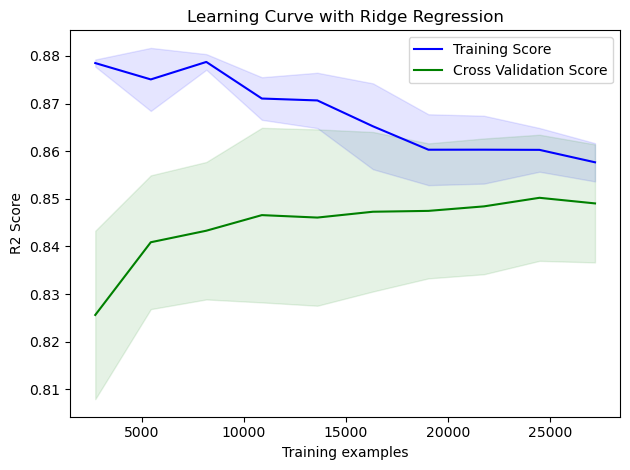

In [31]:
# Plot the learning curve
plt.figure()
plt.plot(train_sizes, train_scores_mean, label="Training Score", color='b')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color='b', alpha=0.1)
plt.plot(train_sizes, val_scores_mean, label="Cross Validation Score", color='g')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, color='g', alpha=0.1)

# Adding titles and labels
plt.title("Learning Curve with Ridge Regression")
plt.xlabel("Training examples")
plt.ylabel("R2 Score")
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [32]:
# Evaluate the model on the validation set
score_val = ridge_best.score(X_val_scaled, Y_val)
print("R-squared on the validation set:", score_val)

# Make predictions
Y_pred = ridge_best.predict(X_test_scaled)


R-squared on the validation set: 0.8654196938777463


       actual value      predicted     difference
24961      105912.0  175074.148775  -69162.148775
40922       75588.0   45083.577288   30504.422712
12323       40800.0    9795.421234   31004.578766
5755       442800.0  570179.824600 -127379.824600
15411      388800.0  543226.291132 -154426.291132
...             ...            ...            ...
9629       264000.0  301398.459035  -37398.459035
7325       102000.0  100387.872113    1612.127887
1218       178800.0  137119.097254   41680.902746
31936      103200.0  129188.030506  -25988.030506
3093       420000.0  468783.177938  -48783.177938

[9069 rows x 3 columns]


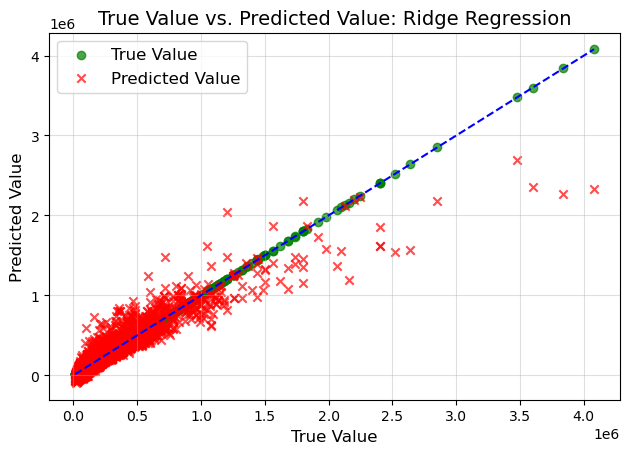

In [33]:
# Create a DataFrame to compare actual and predicted values
pred_table = pd.DataFrame(data={"actual value": Y_test, "predicted": Y_pred})
pred_table["difference"] = pred_table["actual value"] - pred_table["predicted"]
print(pred_table)

# Scatter plot for true vs predicted values
plt.scatter(Y_test, Y_test, c='green', marker='o', label='True Value', alpha=0.7)
plt.scatter(Y_test, Y_pred, c='red', marker='x', label='Predicted Value', alpha=0.7)
plt.xlabel("True Value", fontsize=12)
plt.ylabel("Predicted Value", fontsize=12)
plt.title("True Value vs. Predicted Value: Ridge Regression", fontsize=14)
plt.legend(fontsize=12)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='blue')
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()